# **1. Mounting GDrive**

In [218]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **2. Importing Libraries**

In [1]:
!pip install haversine


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import haversine as hs
import seaborn as sns
from sklearn.preprocessing import StandardScaler
## remove warning messages
import warnings
warnings.filterwarnings("ignore")

# **3. Importing Test Data**


```
Reading and understanding data
```



In [4]:
# Loading Data into pandas data frame
df_test=pd.read_csv("fraudTest.csv", index_col=0)

In [5]:
# printing the top 5 rows of the data frame
df_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
# Checking for the count of rows and columns.
df_test.shape

(555719, 22)

In [7]:
# printing data information with data types and non-null count for all columns
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [8]:
# examine the numerical columns in the data frame
df_test.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [9]:
# scanning Number of Null/Empty values in  each column
df_test.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
# Count of Duplicated Rows in the Data Frame
df_test.duplicated().sum()

0

Observations:
  1. The data set has a total of 555719 rows and 22 columns.
  2. The target variable is the column - is_fraud.
  3. There are no null values in the training data set
  4. There are no duplicate datas available.


# **4. Data Perparation**

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

### **4.1 Droping the columns :**
  1. cc_cum - since credit card numbers are unique, it does not add any value to the model.
  2. first and last - names does not add an value to the model.
  3. street, city, zip, state - since huge amount of streets, city and zipcode are present, creating dummy variables for each street will make the model complex.
  4. job - since there are large amounts of categories present in the job column, creating dummy variables for each category will create a huge sparse matrix
  5. trans_num - since transaction numbers are unique, it does not add any value to the model.
  6. unix_time - since we have already extracted the time from trans_date_trans_time column, unix time is not required
  7. merchant - Since there are many no of categories in the merchant column,creating dummy variables for each category will create a huge sparse matrix

In [12]:
df_test=df_test.drop(['cc_num','first','last','street', 'city', 'zip','job','trans_num','unix_time','merchant','state'], axis=1)

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   category               555719 non-null  object 
 2   amt                    555719 non-null  float64
 3   gender                 555719 non-null  object 
 4   lat                    555719 non-null  float64
 5   long                   555719 non-null  float64
 6   city_pop               555719 non-null  int64  
 7   dob                    555719 non-null  object 
 8   merch_lat              555719 non-null  float64
 9   merch_long             555719 non-null  float64
 10  is_fraud               555719 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 50.9+ MB


### **4.1 Handling column dob**

In [14]:
#splitting the trans_date_trans_time column into date column
df_test['date']=pd.to_datetime(df_test.trans_date_trans_time).dt.date
#converting the data type from object to date format
df_test.dob=pd.to_datetime(df_test.dob).dt.date
#creating a new variable called age by subtracting the transaction date and dob
df_test['age']=(((df_test.date-df_test.dob).dt.days)/365).astype(int)
#dropping the column dob
df_test=df_test.drop('dob', axis=1)

### **4.2 Handling column trans_date_trans_time**

In [15]:
#binning the trans_date_trans_time column into Morning, noon, evening, late_evening, night and late_night
bins=[0,5,12,17,19,21,24]
labels=['late_night', 'morning', 'noon', 'eveing', 'late_evening', 'night']
#converting the column trans_date_trans_time data type from object to datetime
df_test.trans_date_trans_time=pd.to_datetime(df_test.trans_date_trans_time)
#creating a new variable named time_of_day to store the binned values
df_test['time_of_day']=pd.cut(df_test.trans_date_trans_time.dt.hour, bins, labels=labels, right=False)

In [16]:
#binning the column trans_date_trans_time into days of the week and storing in column days_of_week
df_test['days_of_week']=df_test.trans_date_trans_time.dt.day_name()
df_test['days_of_week'] = df_test['days_of_week'].map({'Monday':1, 'Tuesday':2, 'Wednesday': 3, 'Thursday': 4,
                                                          'Friday':5, 'Saturday':6, 'Sunday': 7})

In [17]:
#dropping the column trans_date_trans_time and date
df_test=df_test.drop(['trans_date_trans_time','date'], axis=1)

### **4.3 Handling column lat, long, merch_lat, merch_long**

In [18]:
#calculating the distance between the base location and merchant location in kms using haversine
df_test['distance'] = df_test.apply(lambda row: hs.haversine((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])), axis=1)

In [19]:
#converting float to int
df_test.distance=df_test.distance.astype(int)

In [20]:
#dropping the columns lat, long, merch_lat, and merch_long as they individually do not add any value to the model
df_test=df_test.drop(['lat','long','merch_lat','merch_long'], axis=1)

In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   category      555719 non-null  object  
 1   amt           555719 non-null  float64 
 2   gender        555719 non-null  object  
 3   city_pop      555719 non-null  int64   
 4   is_fraud      555719 non-null  int64   
 5   age           555719 non-null  int32   
 6   time_of_day   555719 non-null  category
 7   days_of_week  555719 non-null  int64   
 8   distance      555719 non-null  int32   
dtypes: category(1), float64(1), int32(2), int64(3), object(2)
memory usage: 34.4+ MB


# **5. Dealing with outliers**

In [22]:
df_test.describe()

,amt,city_pop,is_fraud,age,days_of_week,distance
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000
mean,69.392810,8.822189e+04,0.003860,46.423797,3.726779,75.604870
std,156.745941,3.003909e+05,0.062008,17.442737,2.178681,29.118143
min,1.000000,2.300000e+01,0.000000,15.000000,1.000000,0.000000
25%,9.630000,7.410000e+02,0.000000,33.000000,2.000000,55.000000
50%,47.290000,2.408000e+03,0.000000,44.000000,3.000000,78.000000
75%,83.010000,1.968500e+04,0.000000,58.000000,6.000000,98.000000
max,22768.110000,2.906700e+06,1.000000,96.000000,7.000000,150.000000


The numerical columns present are
1. amt
2. city_pop
3. age
4. distance

### **5.1 Checking for outliers in column amt**

<Axes: >

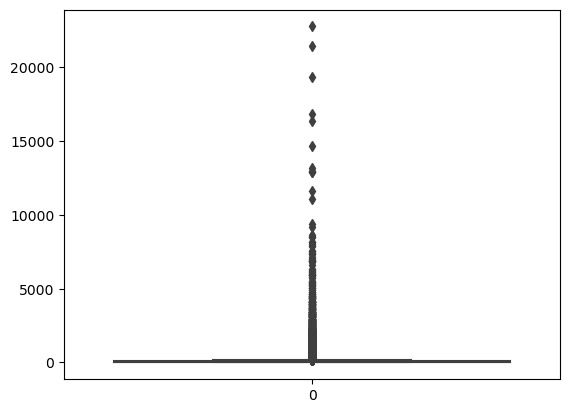

In [25]:
#boxplot of the column amt
sns.boxplot(df_test.amt)

<Axes: xlabel='amt', ylabel='Density'>

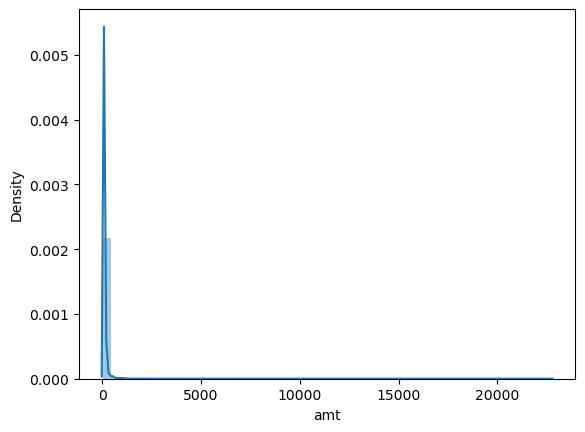

In [26]:
#distribution plot of the column amt
sns.distplot(df_test.amt)

### **5.2 Checking for outliers in column city_pop**

In [27]:
#checking outliers in the column city_pop
df_test.city_pop.describe()

count    5.557190e+05
mean     8.822189e+04
std      3.003909e+05
min      2.300000e+01
25%      7.410000e+02
50%      2.408000e+03
75%      1.968500e+04
max      2.906700e+06
Name: city_pop, dtype: float64

<Axes: >

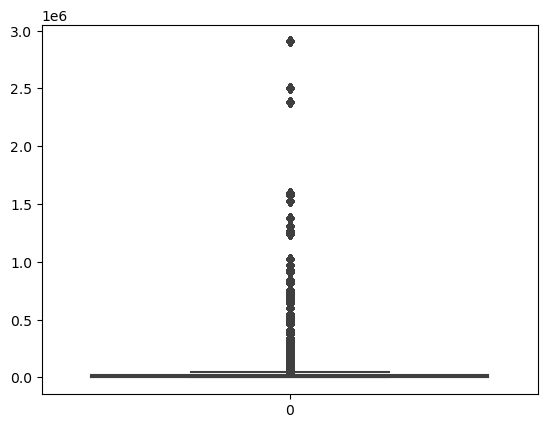

In [28]:
#boxplot of the column city_pop
sns.boxplot(df_test.city_pop)

<Axes: xlabel='city_pop', ylabel='Density'>

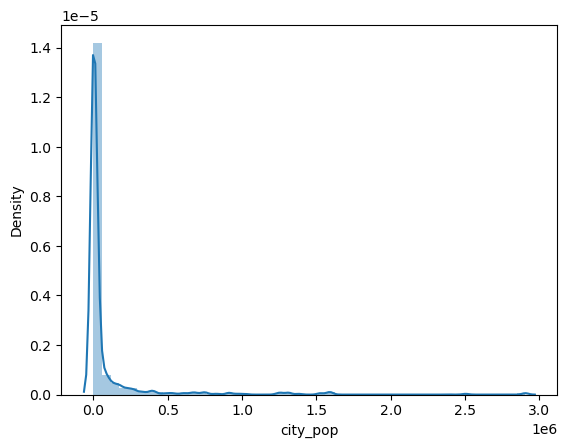

In [29]:
#distribution plot of the column city_pop
sns.distplot(df_test.city_pop)

more than 90% of data lies between 0 to 0.5 in city_pop

### **5.3 Checking for outliers in column age**

<Axes: >

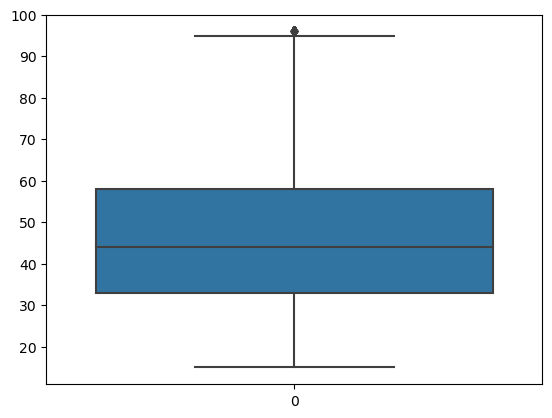

In [30]:
#checking outliers in the column age
sns.boxplot(df_test.age)

<Axes: xlabel='age', ylabel='Density'>

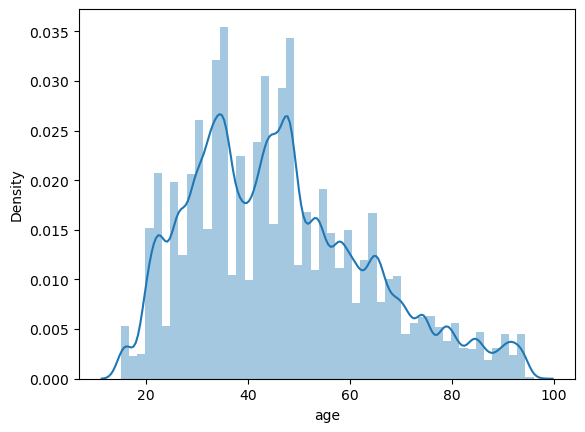

In [31]:
#distribution plot of the column age
sns.distplot(df_test.age)

The column age does not have any outliers

### **5.4 Checking for outliers in column distance**

<Axes: >

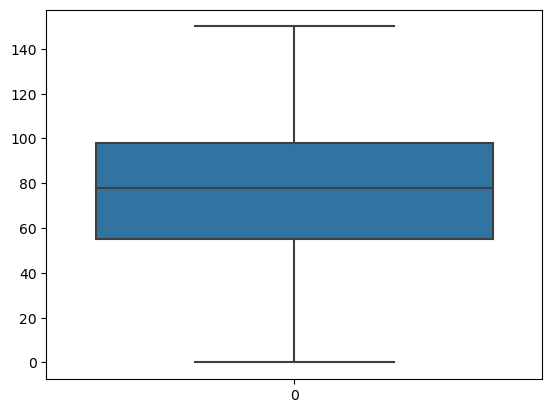

In [32]:
#checking outliers in the column distance
sns.boxplot(df_test.distance)

<Axes: xlabel='distance', ylabel='Density'>

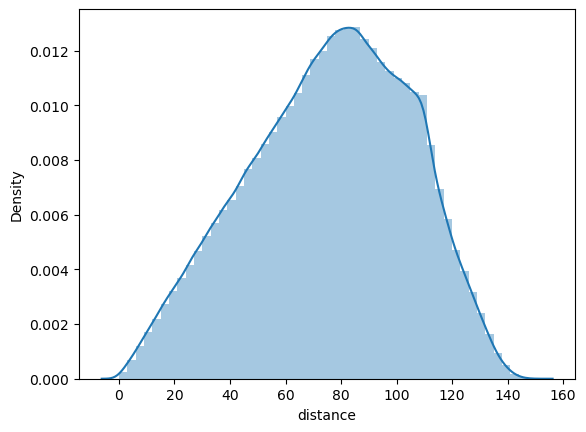

In [33]:
#distribution plot of the column Distance
sns.distplot(df_test.distance)

The column Distance does not have any outliers

# **6. Univariate Analysis fo categorical values**

In [34]:
df_test.head()

,category,amt,gender,city_pop,is_fraud,age,time_of_day,days_of_week,distance
0,personal_care,2.86,M,333497,0,52,noon,7,24
1,personal_care,29.84,F,302,0,30,noon,7,104
2,health_fitness,41.28,F,34496,0,49,noon,7,59
3,misc_pos,60.05,M,54767,0,32,noon,7,27
4,travel,3.19,M,1126,0,65,noon,7,104


the categorical columns are :
1. category
2. gender
3. time_of_day
4. days_of_week

In [35]:
#function for plotting the columns
def univar_analysis(col):
    plt.figure(figsize=(25, 5))
    ax = sns.countplot(x = col, hue = df_test.is_fraud, data=df_test)

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

    plt.xticks(rotation = 90)
    plt.show()

### **6.1 category**

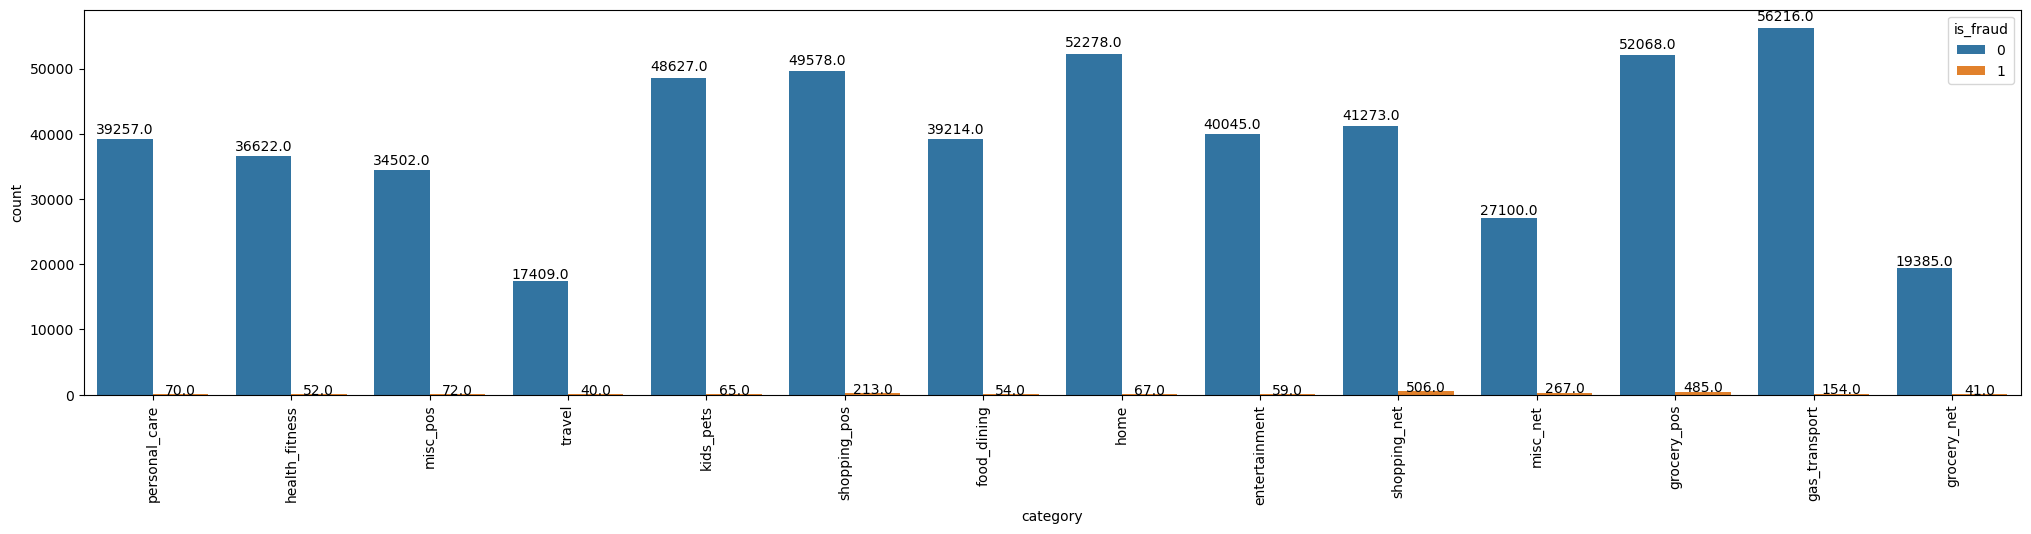

In [36]:
# plotting count plot for category
univar_analysis('category')

Observations:


1.   The highest no of fradulent transactions have occured in the categories grocery_pos and shopping_net
2.  The least no of fraudlent transactions have occured in the categories travel andhealth_fitness.
3.  Huge volume of transactions have occured under the cateegory gas_tranport


### **6.2 Gender**

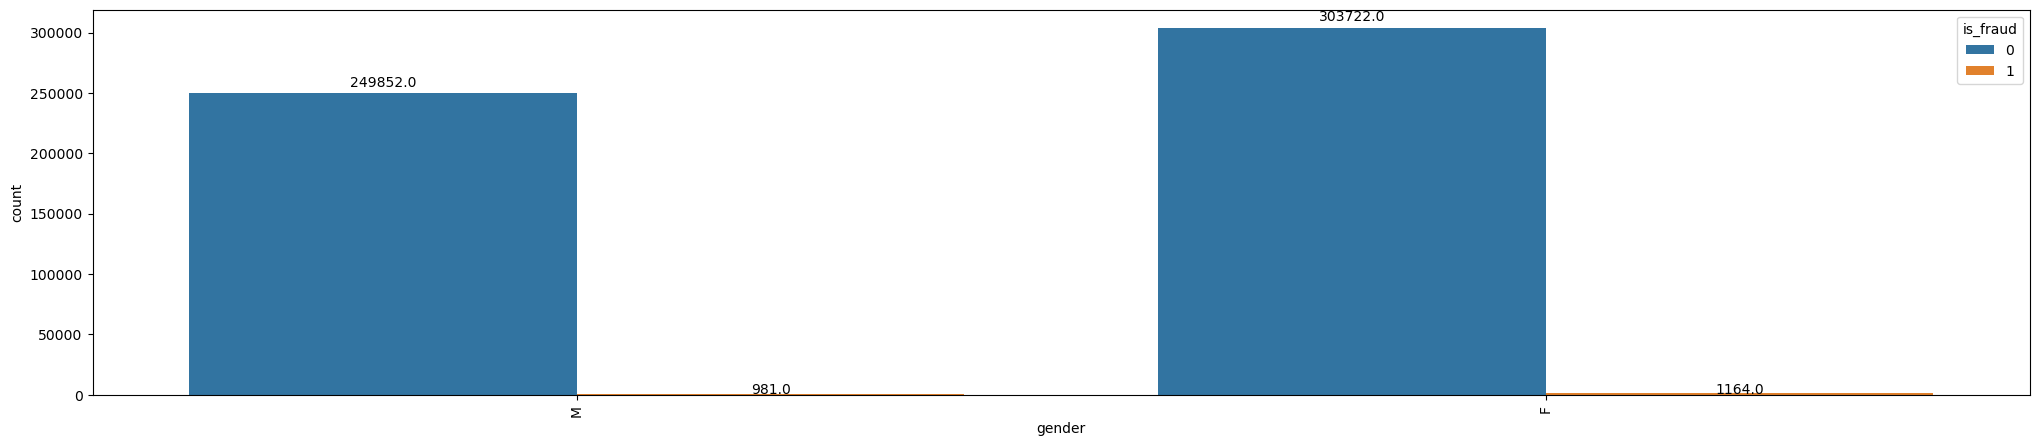

In [37]:
# plotting count plot for gender
univar_analysis('gender')

Observations:


1.   Female gender has higher no of transactions compared to male
2.   The no. of fradulent transactions are almost siimilar for both the genger irrespective of the volume of ransactions

### **6.3 time_of_day**

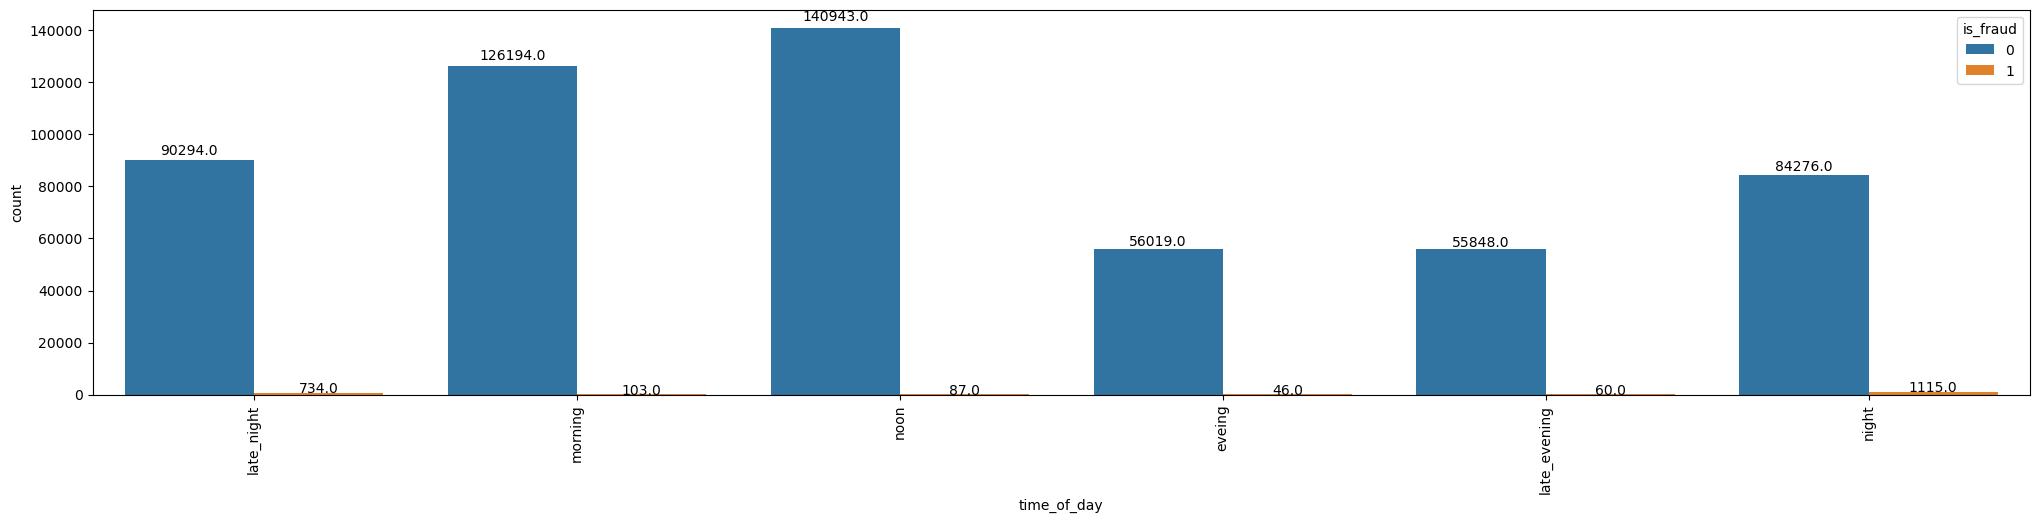

In [39]:
# plotting count plot for time_of_day
univar_analysis('time_of_day')

Observations:


1.   Night and Midnight have highest no of fraudelent transaction irrespectie of huge volume of transactions taking place during noon
2.   Morning and nonn have the highest volume of transactions



### **6.4 days_of_week**

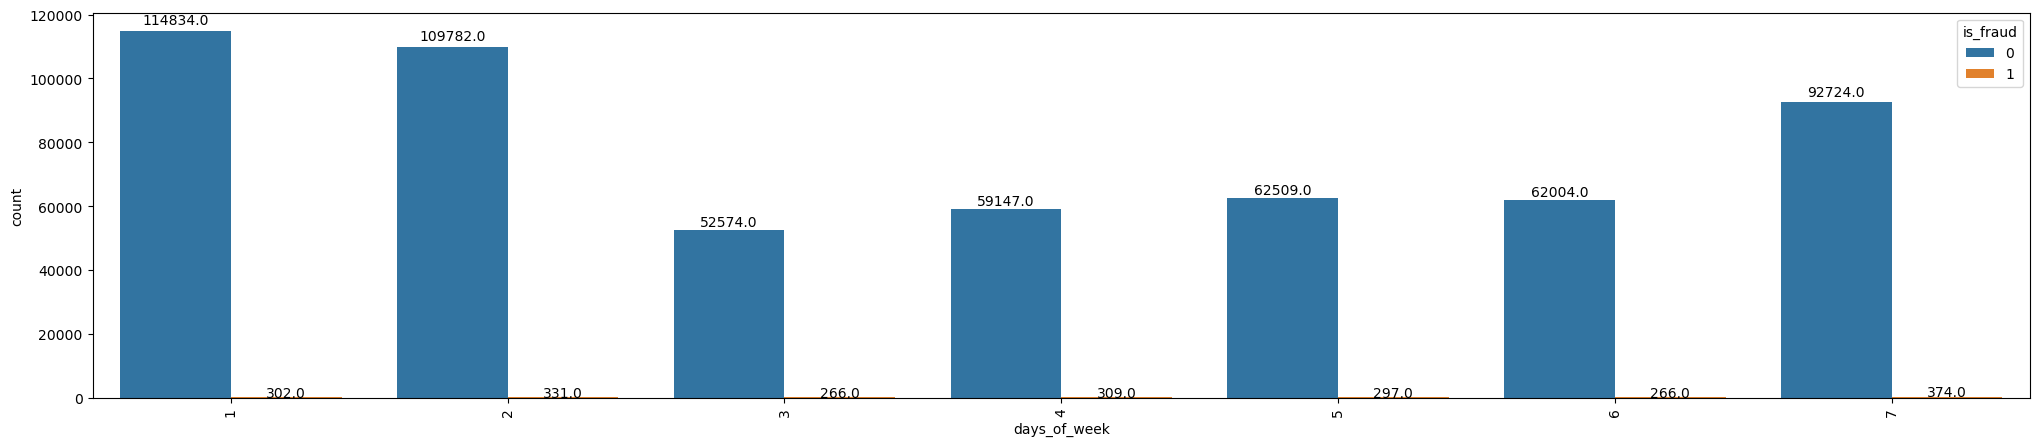

In [40]:
# plotting count plot for days_of_week
univar_analysis('days_of_week')


Observtions:


1.   The no of fraudelent transaction remain almost similar irrespective of he days of the week
2.   Sunday and Monday have the highest volume of transactions



# **7. Correlation**

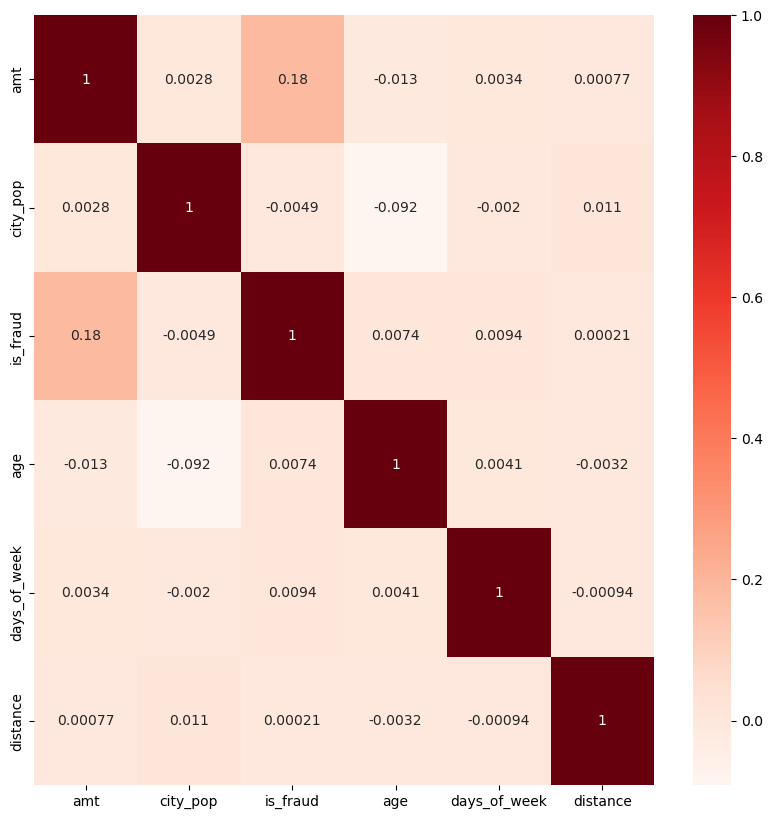

In [41]:
# plotting a correlation values using sns for numerical values
plt.figure(figsize = (10,10))
sns.heatmap(df_test.corr(), annot = True, cmap= 'Reds')
plt.show()

Observations:


1.   The target variable is_fraud and amt have the highest correlation of 0.22



# **8. Dummy Variables**

Lets create dummy variables for categorical variables:

1. category
2. gender
3. time_of_day




### **8.1 dummy variables -category**

In [42]:
#creating dummy variables for the column category
#One-Hot encoding
dummy=pd.get_dummies(df_test.category, drop_first=True)
df_test=pd.concat([df_test,dummy], axis=1)
df_test=df_test.drop('category',axis=1)

### **8.2 dummy variables -Gender**

In [43]:
dummy=pd.get_dummies(df_test.gender, drop_first=True,).rename(columns={'M':'is_male'})
df_test=pd.concat([df_test,dummy], axis=1)
df_test=df_test.drop('gender', axis=1)

### **8.3 dummy variables -time_of_day**

In [44]:
#creating dummy variables for the column time_of_day
dummy=pd.get_dummies(df_test.time_of_day, drop_first=True)
df_test=pd.concat([df_test,dummy], axis=1)
df_test=df_test.drop('time_of_day', axis=1)

In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   amt             555719 non-null  float64
 1   city_pop        555719 non-null  int64  
 2   is_fraud        555719 non-null  int64  
 3   age             555719 non-null  int32  
 4   days_of_week    555719 non-null  int64  
 5   distance        555719 non-null  int32  
 6   food_dining     555719 non-null  uint8  
 7   gas_transport   555719 non-null  uint8  
 8   grocery_net     555719 non-null  uint8  
 9   grocery_pos     555719 non-null  uint8  
 10  health_fitness  555719 non-null  uint8  
 11  home            555719 non-null  uint8  
 12  kids_pets       555719 non-null  uint8  
 13  misc_net        555719 non-null  uint8  
 14  misc_pos        555719 non-null  uint8  
 15  personal_care   555719 non-null  uint8  
 16  shopping_net    555719 non-null  uint8  
 17  shopping_p

# **9. Standardisation**

Scaling the numerical variables using standardisation:
1. amt
2. city_pop
3. age
4. distance

In [50]:
scaler=StandardScaler()
num_cols = ['amt', 'city_pop', 'age', 'distance']

df_test[num_cols] = scaler.fit_transform(df_test[num_cols])

In [51]:
df_test[num_cols].describe()

,amt,city_pop,age,distance
count,5.557190e+05,5.557190e+05,5.557190e+05,5.557190e+05
mean,3.375506e-18,3.126179e-18,1.237686e-16,-1.940660e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-4.363295e-01,-2.936140e-01,-1.801542e+00,-2.596489e+00
25%,-3.812722e-01,-2.912238e-01,-7.695930e-01,-7.076306e-01
50%,-1.410105e-01,-2.856743e-01,-1.389575e-01,8.225565e-02
75%,8.687435e-02,-2.281592e-01,6.636695e-01,7.691133e-01
max,1.448123e+02,9.382710e+00,2.842229e+00,2.554943e+00


# **10. Class imbalance**

In [46]:
classes=df_test['is_fraud'].value_counts()
normal_share=classes[0]/df_test['is_fraud'].count()*100
fraud_share=classes[1]/df_test['is_fraud'].count()*100

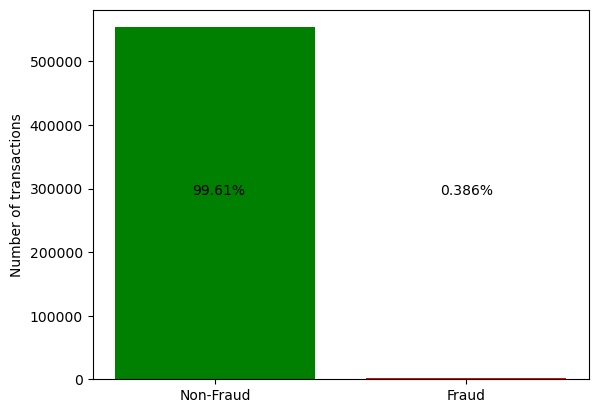

In [47]:
plt.bar(['Non-Fraud','Fraud'], classes, color=['g','r'])
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share),(0.7, 0.5), xycoords='axes fraction')
plt.show()

Observations:
1. only 0.38% of the givent data represents the class Fraud

In [48]:
df_test.to_csv('test_modified.csv')